In [230]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from math import *

In [231]:
df = pd.read_csv("/kaggle/input/linearregression/Data2.csv")
df

,x,y
0,0.1,5.764952e+01
1,0.2,4.740870e+01
2,0.3,6.946902e+01
3,0.4,3.755086e+01
4,0.5,7.860685e+01
...,...,...
95,9.6,3.636073e+05
96,9.7,8.819300e+05
97,9.8,1.053557e+06
98,9.9,4.503040e+05


In [232]:
x_list = [float(i) for i in list(df['x'])]
y_list = [float(i) for i in list(df['y'])]


In [233]:
xarray = np.array(df['x'])
a = sum(xarray)
c = sum([i**2 for i in xarray])

In [234]:
matrix_a = [[a,len(df)],[c,a]]
matrix_a

[[505.0, 100], [3383.5000000000005, 505.0]]

In [235]:
a_inverse = np.linalg.inv(matrix_a)
a_inverse

array([[-0.00606061,  0.00120012],
       [ 0.04060606, -0.00606061]])

In [236]:
y_n = [log(i) for i in df['y']]
sum_y_n = sum(y_n)
sum_y_n

859.5759798115773

In [237]:
y_new_array = np.array(y_n)

In [238]:
q = y_new_array *xarray
print(sum(q))

5151.608824799193


In [239]:
B = [[sum_y_n], [sum(q)]]
print(B)

[[859.5759798115773], [5151.608824799193]]


In [240]:
w = a_inverse@B
w 

array([[0.97299745],
       [3.68212267]])

In [241]:
b_zero = e**w[1]
b_one = w[0]
y_lst = [b_zero*(e**(b_one*i)) for i in df['x']]

In [242]:
df['predicted'] = np.array(y_lst)
df

,x,y,predicted
0,0.1,5.764952e+01,43.790741
1,0.2,4.740870e+01,48.265748
2,0.3,6.946902e+01,53.198059
3,0.4,3.755086e+01,58.634405
4,0.5,7.860685e+01,64.626296
...,...,...,...
95,9.6,3.636073e+05,452660.739299
96,9.7,8.819300e+05,498918.457322
97,9.8,1.053557e+06,549903.283951
98,9.9,4.503040e+05,606098.285727


In [243]:
def r_square(df):
    return 1 - RSS(df)/TSS(df)
def RSS(df):
    return np.sum((df['y']-df['predicted'])**2)

def TSS(df):
    return np.sum((df['y']-np.mean(df['predicted']))**2)
r_square(df)

0.789068314366836

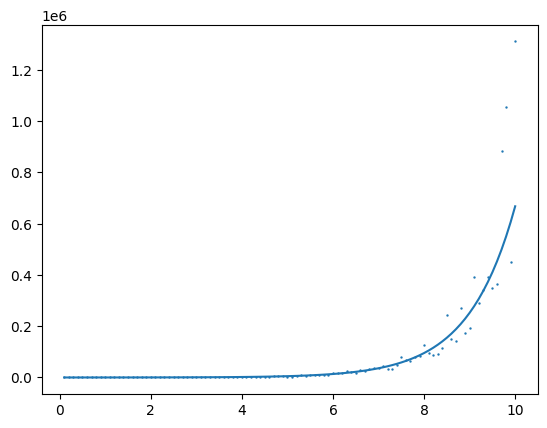

In [244]:
x = [float(i) for i in df['x']]
y = [float(i) for i in df['y']]
plt.scatter(x,y,s=0.5)
plt.plot(x,df['predicted'])
plt.show()

In [245]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [246]:
x = df[['x']]
y = df[['y']]
y_log = np.log(y)
model = LinearRegression()
model.fit(x, y_log)

LinearRegression()

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


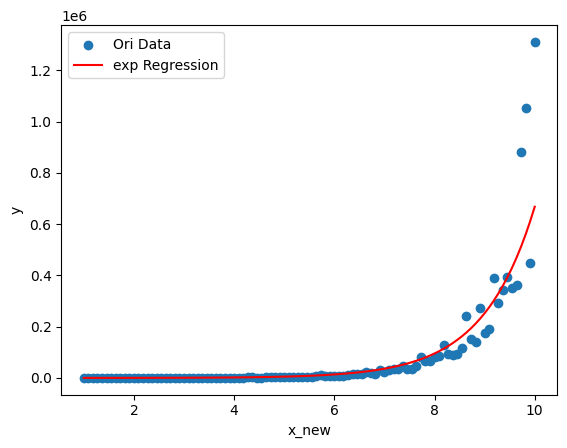

In [247]:
x_new = np.linspace(1, 10, 100).reshape(-1, 1)
y_pred_log = model.predict(x_new)
y_pred = np.exp(y_pred_log)
plt.scatter(x_new, y, label='Ori Data')
plt.plot(x_new, y_pred, 'r-', label='exp Regression')

plt.xlabel('x_new')
plt.ylabel('y')
plt.legend()
plt.show()

In [248]:
df = df.drop(columns='predicted')

In [249]:
y = np.array(df['y'])
df = df.drop(columns='y')

In [250]:
n = 1

In [251]:
def gradient(w,df):
    result = 0
    s_df = df.sample(frac=1, axis=1, random_state=42) 
    for i in range(len(s_df)):
        r= np.array(s_df.iloc[i][:])
        y_hat = r@w
        result += (log(y[i])-y_hat)*s_df.iloc[i][:]
    return (result*(-2)/len(df)).values.reshape((-1,1))

In [254]:
eta = 0.00001
w_o = np.zeros((n,1))
while True:
    w_n = w_o - eta*(gradient(w_o,df))
    up = w_o - w_n
    down = w_n
    if np.linalg.norm(up)/np.linalg.norm(down) <= 1e-4 :
        break   
    w_o = w_n
w = np.array(w_o)
print(w) 

[[1.3266423]]


In [258]:
c = 0.8 
bzero = e**c

def predict(df, w):
    lst = []
    for i in range(len(df)):
        r = np.array(df.iloc[i][:])
        r1 = r.reshape((1, -1))  # Reshape to a row vector
        prediction = bzero*e**(w.T @ r1)
        lst.append(prediction.flatten()) 
    return np.array(lst)
result = predict(df,w)

In [259]:
df['predicted'] = result

In [260]:
df['y'] = y

In [261]:
def r_square(df):
    return 1 - RSS(df) / TSS(df)
def RSS(df):
  return np.sum((df['y'] - df['predicted']) ** 2)
def TSS(df):
  return np.sum((df['y'] - np.mean(df['predicted']))** 2)
print("Rquare",r_square(df))
print("RSS",RSS(df))
print("TSS",TSS(df))

Rquare 0.7968164552119507
RSS 860643339506.3549
TSS 4235792521506.2754


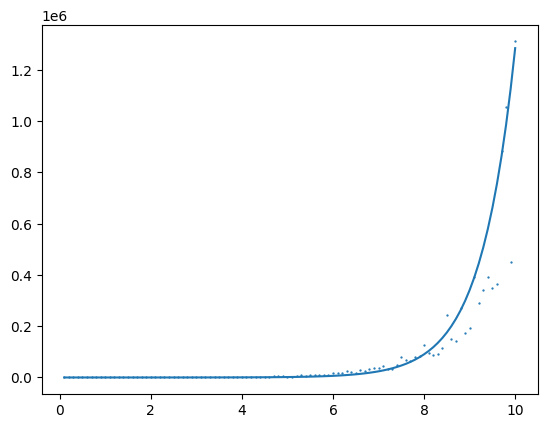

In [263]:
x_list = [float(i) for i in df['x']]
y_list = [float(i) for i in df['y']]
plt.scatter(x_list, y_list,s=0.4)
plt.plot(x_list, df['predicted'])
plt.show()